In [1]:
#CAPSTONE PROJECT

In [2]:
#PORTFOLIO OF Indian BANK STOCKS
#PART 1- RETURN ANALYSIS#

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [270]:
#HDFC BANK
HDF = pd.read_csv("C:/Users/Shourya Sharma/Desktop/HDFC.csv",parse_dates=True, index_col='Date').sort_index(ascending=True)

IND = pd.read_csv("C:/Users/Shourya Sharma/Desktop/INDUSIND.csv",parse_dates=True, index_col='Date').sort_index(ascending=True)
    
ICI = pd.read_csv("C:/Users/Shourya Sharma/Desktop/ICICI.csv",parse_dates=True, index_col='Date').sort_index(ascending=True)
        
KOT = pd.read_csv("C:/Users/Shourya Sharma/Desktop/KOTAK.csv",parse_dates=True, index_col='Date').sort_index(ascending=True)
            
SBI = pd.read_csv("C:/Users/Shourya Sharma/Desktop/SBI.csv",parse_dates=True, index_col='Date').sort_index(ascending=True)
                

In [271]:
portfolio_list = [HDF, IND, ICI, KOT, SBI]

In [272]:
HDF
#checking the date order #CHECKED

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2020-01-01,1275.00,1280.40,1271.0,1279.05,1277.217288,44876,2304,5.731640e+07,21684,48.32,9.40,4.05
2020-01-02,1278.00,1287.90,1277.5,1286.65,1284.666756,41084,2219,5.277925e+07,16449,40.04,10.40,8.65
2020-01-03,1289.00,1289.00,1263.0,1268.10,1271.054528,1100857,5701,1.399249e+09,1034354,93.96,26.00,-20.90
2020-01-06,1265.80,1265.80,1236.0,1241.15,1251.677433,574250,8176,7.187758e+08,508762,88.60,29.80,-24.65
2020-01-07,1258.30,1271.75,1252.2,1260.85,1265.811012,594878,6962,7.530031e+08,475489,79.93,19.55,2.55
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-21,1756.05,1758.75,1733.7,1741.95,1743.913879,182127,9504,3.176138e+08,82855,45.49,25.05,-14.10
2024-11-22,1740.15,1753.80,1729.3,1745.95,1744.121421,437651,19256,7.633165e+08,154639,35.33,24.50,5.80
2024-11-25,1779.00,1801.90,1765.0,1784.60,1779.934495,1236300,39688,2.200533e+09,722917,58.47,36.90,5.60


In [315]:
ticker = {'HDF':HDF, 'IND':IND, 'ICI':ICI, 'KOT':KOT, 'SBI':SBI}

In [274]:
#RETURN ANALYSIS

In [275]:
#TASK---> DEFINE THE START AND END DATE 

In [276]:
HDF.index.min

<bound method Index.min of DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-18',
               '2024-11-19', '2024-11-21', '2024-11-22', '2024-11-25',
               '2024-11-26', '2024-11-27'],
              dtype='datetime64[ns]', name='Date', length=1220, freq=None)>

In [277]:
# TASK---> PLOT THE CLOSED PRICES OF ALL THE STOCKS 

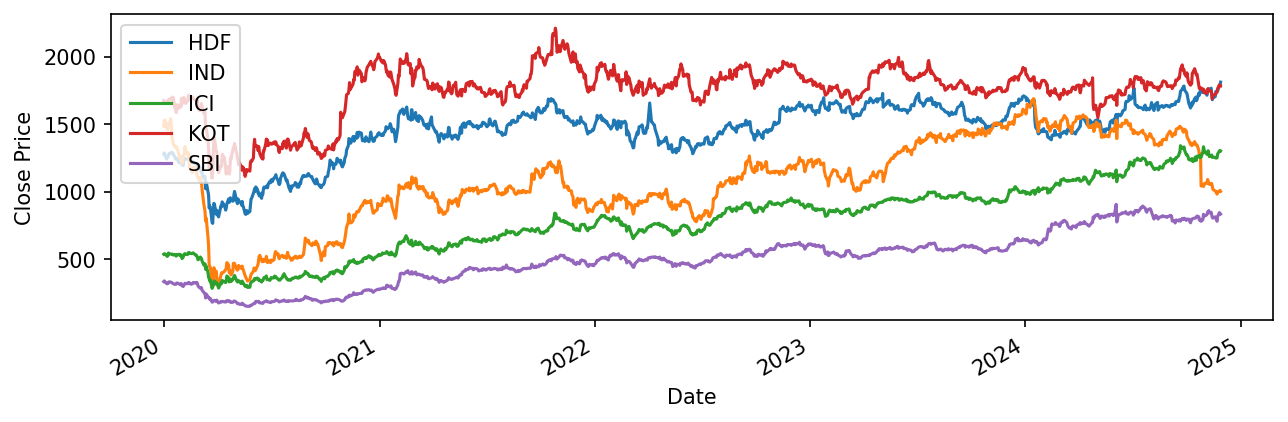

In [278]:
fig,ax= plt.subplots(dpi=150,figsize=(10,3))
HDF['Close Price'].plot(ax=ax, label='HDF')
IND['Close Price'].plot(ax=ax, label='IND')
ICI['Close Price'].plot(ax=ax, label='ICI')
KOT['Close Price'].plot(ax=ax, label='KOT')
SBI['Close Price'].plot(ax=ax, label='SBI')
plt.legend()
ax.set_ylabel('Close Price') 
ax.set_xlabel('Date') 
plt.show()


In [279]:
#TASK---> Create a fucniton that takes Close price adn then calculate  the stock percent rise or decline from any set of given dates.

In [280]:
def perc_calc(ticker,start_date, end_date):
    if start_date not in ticker['Close Price'].index:
        return f"Start date not in index"
    if end_date not in ticker['Close Price'].index:
        return f"End Date not in index"
    
    close_start = ticker['Close Price'][start_date]
    close_end = ticker['Close Price'][end_date]
    change = 100*(close_end-close_start)/close_start
    
    return f"Percent Change:{np.round(change,2)}"

In [281]:
perc_calc(KOT, '2021-15-06','2024-18-05')

'Start date not in index'

In [282]:
#Create a histogram of the daily returns for each stock in portfolio

In [283]:
def Daily_returns(df):
    df['Daily Percent Change']= 100*(df['Close Price'].pct_change())
    return df

In [284]:
HDF= Daily_returns(HDF)
IND= Daily_returns(IND)
ICI= Daily_returns(ICI)
KOT= Daily_returns(KOT)
SBI= Daily_returns(SBI)


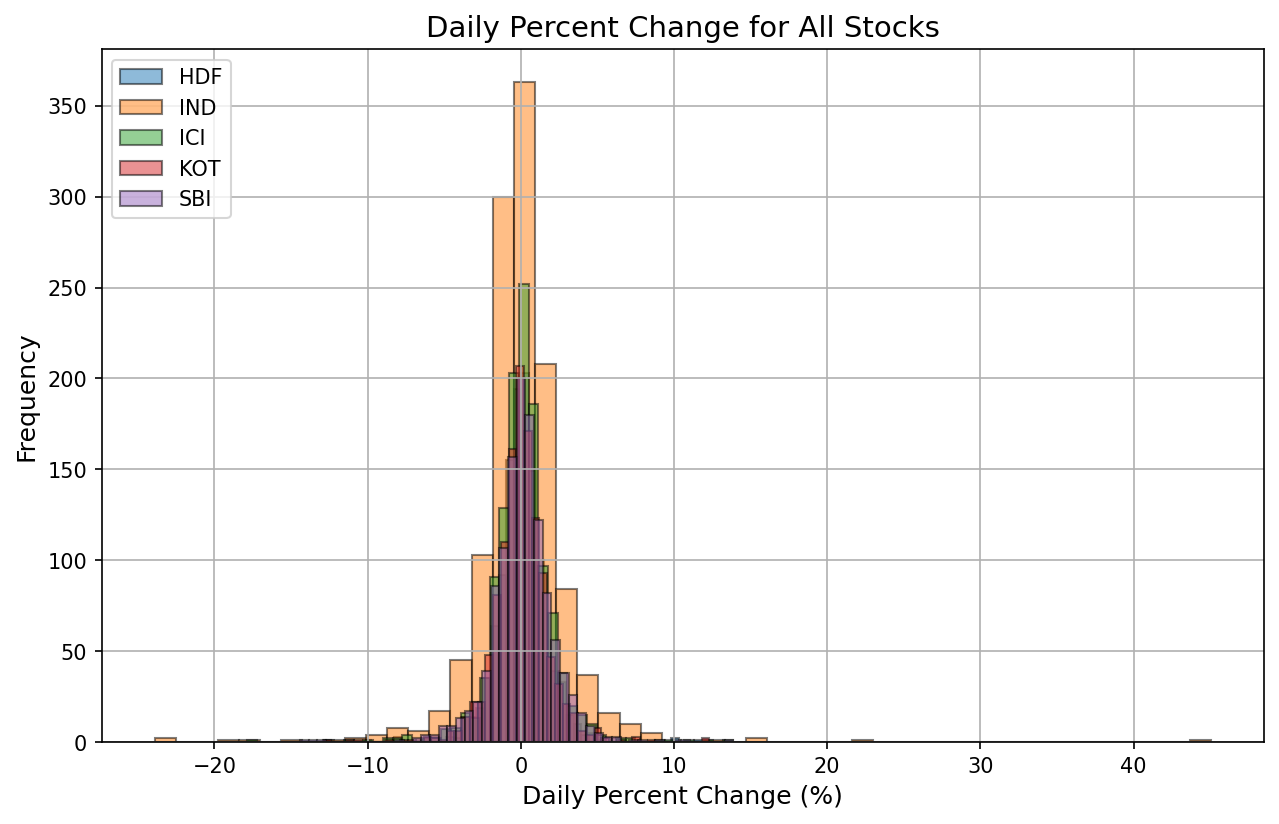

In [285]:
plt.figure(dpi=150, figsize=(10, 6)) 
plt.hist(HDF['Daily Percent Change'], bins=50, alpha=0.5, label='HDF' ,edgecolor= 'black')
plt.hist(IND['Daily Percent Change'], bins=50, alpha=0.5, label='IND' ,edgecolor= 'black')
plt.hist(ICI['Daily Percent Change'], bins=50, alpha=0.5, label='ICI' ,edgecolor= 'black')
plt.hist(KOT['Daily Percent Change'], bins=50, alpha=0.5, label='KOT' ,edgecolor= 'black')
plt.hist(SBI['Daily Percent Change'], bins=50, alpha=0.5, label='SBI' , edgecolor= 'black')
plt.xlabel('Daily Percent Change (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Daily Percent Change for All Stocks', fontsize=14)

# Adding a legend
plt.legend(loc="upper left")

# Displaying the plot
plt.grid(True)  # Optional: adds a grid for better readability
plt.show()

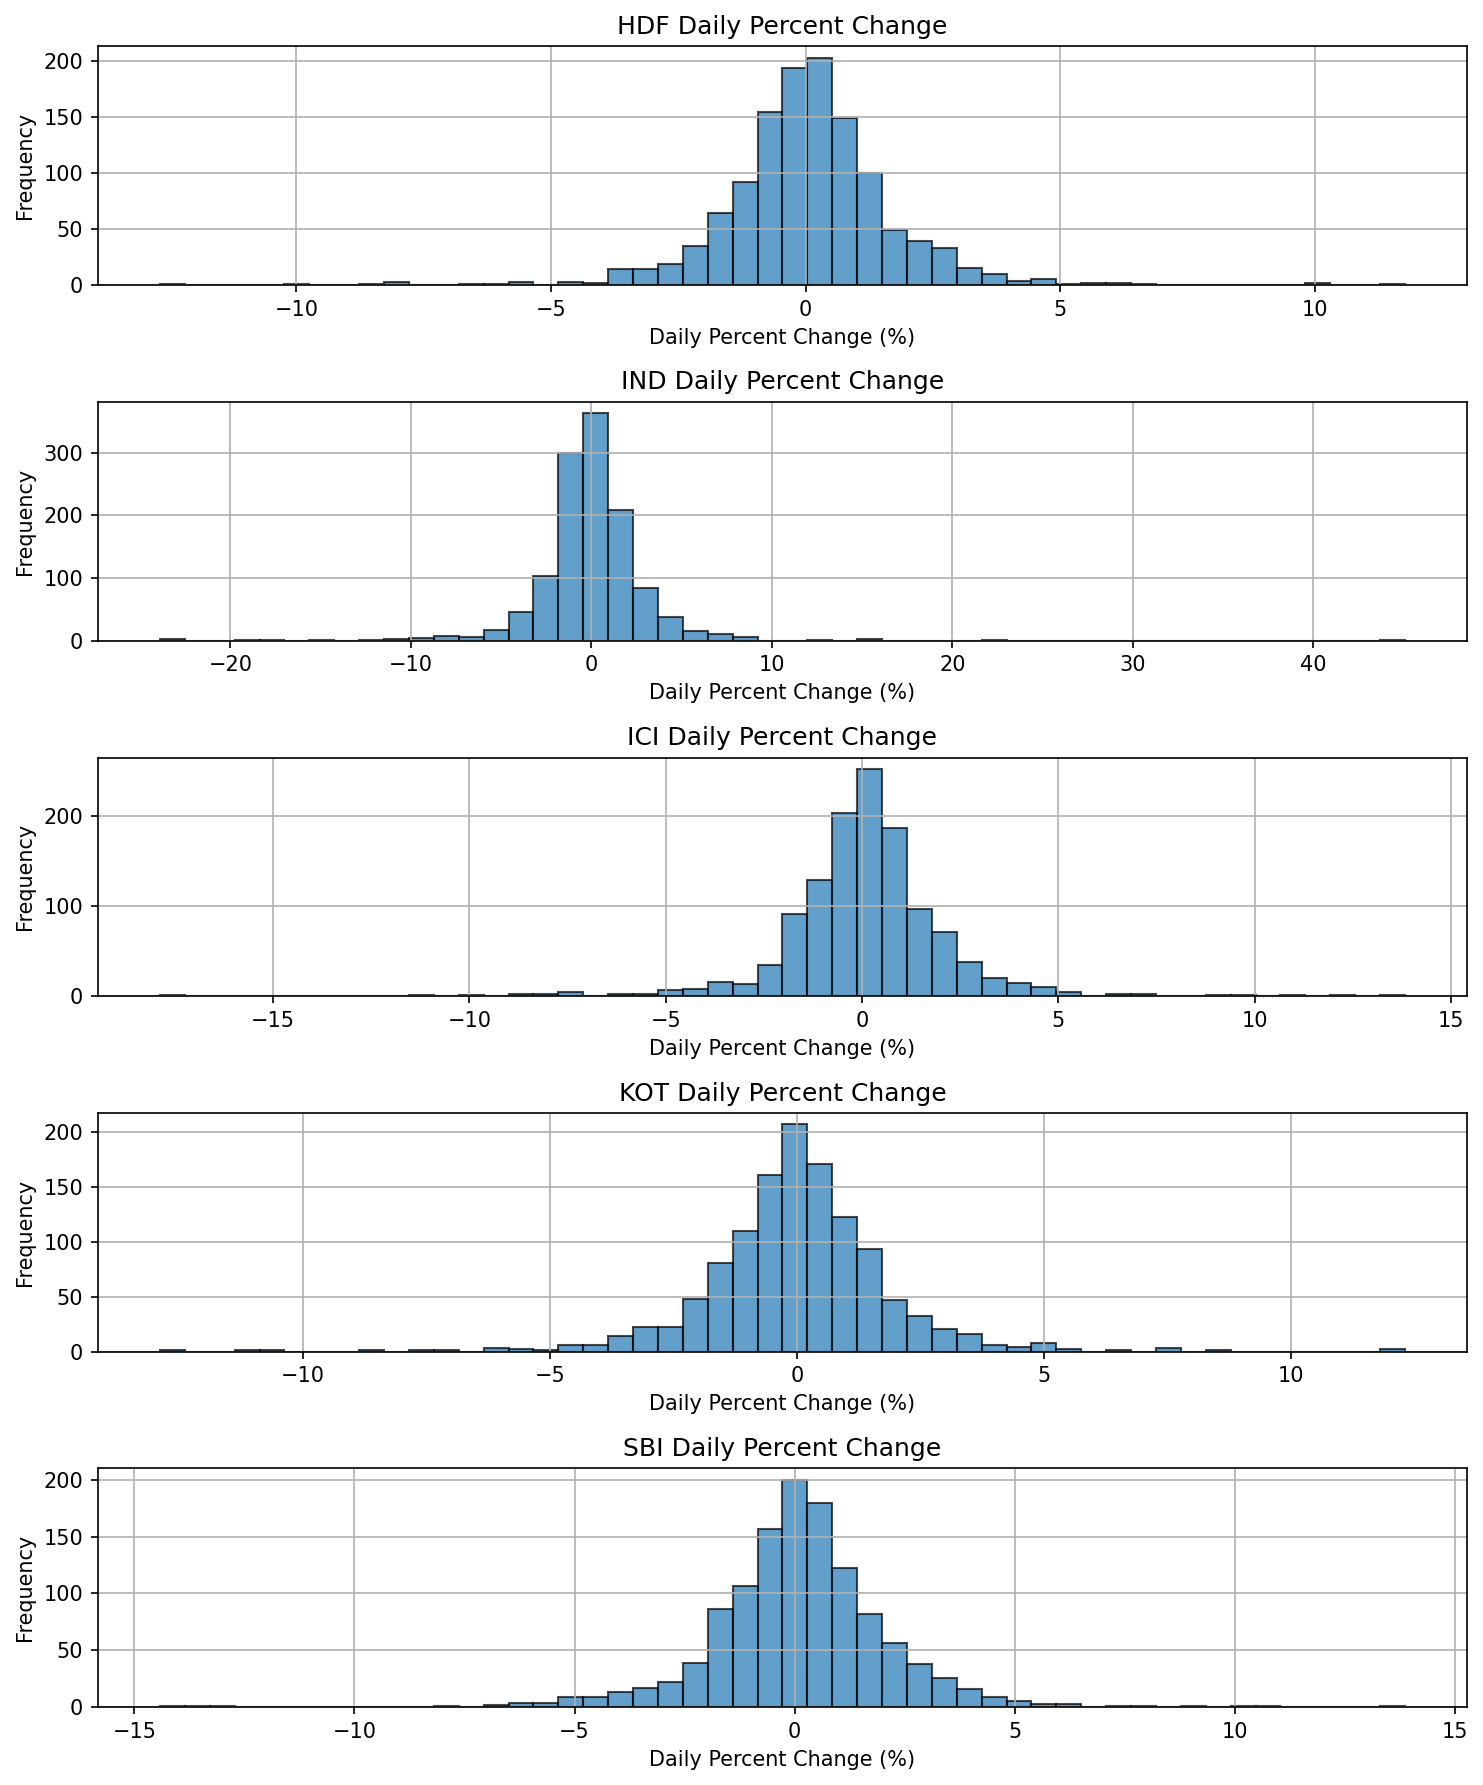

In [286]:
# Create subplots (5 rows, 1 column)
fig, axes = plt.subplots(5, 1, figsize=(10, 12), dpi=150)

# Plot a histogram for each stock in individual subplots
axes[0].hist(HDF['Daily Percent Change'], bins=50, alpha=0.7, edgecolor='black', label='HDF')
axes[0].set_title('HDF Daily Percent Change', fontsize=12)
axes[0].set_xlabel('Daily Percent Change (%)', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)
axes[0].grid(True)

axes[1].hist(IND['Daily Percent Change'], bins=50, alpha=0.7, edgecolor='black', label='IND')
axes[1].set_title('IND Daily Percent Change', fontsize=12)
axes[1].set_xlabel('Daily Percent Change (%)', fontsize=10)
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].grid(True)

axes[2].hist(ICI['Daily Percent Change'], bins=50, alpha=0.7, edgecolor='black', label='ICI')
axes[2].set_title('ICI Daily Percent Change', fontsize=12)
axes[2].set_xlabel('Daily Percent Change (%)', fontsize=10)
axes[2].set_ylabel('Frequency', fontsize=10)
axes[2].grid(True)

axes[3].hist(KOT['Daily Percent Change'], bins=50, alpha=0.7, edgecolor='black', label='KOT')
axes[3].set_title('KOT Daily Percent Change', fontsize=12)
axes[3].set_xlabel('Daily Percent Change (%)', fontsize=10)
axes[3].set_ylabel('Frequency', fontsize=10)
axes[3].grid(True)

axes[4].hist(SBI['Daily Percent Change'], bins=50, alpha=0.7, edgecolor='black', label='SBI')
axes[4].set_title('SBI Daily Percent Change', fontsize=12)
axes[4].set_xlabel('Daily Percent Change (%)', fontsize=10)
axes[4].set_ylabel('Frequency', fontsize=10)
axes[4].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [287]:
SBI


,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Daily Percent Change
Date,,,,,,,,,,,,,
2020-01-01,334.50,335.85,332.25,334.35,334.081571,616224,7187,2.058691e+08,71995,11.68,3.60,-0.15,NaN
2020-01-02,334.85,339.85,333.40,339.30,336.944389,882070,8735,2.972085e+08,158612,17.98,6.45,4.45,1.480485
2020-01-03,338.00,338.00,332.10,333.75,335.043413,761014,9260,2.549727e+08,156994,20.63,5.90,-4.25,-1.635721
2020-01-06,332.00,332.00,317.90,318.95,322.001646,1422311,20595,4.579865e+08,328475,23.09,14.10,-13.05,-4.434457
2020-01-07,324.00,327.00,315.55,318.25,320.270732,1798194,21754,5.759089e+08,344318,19.15,11.45,-5.75,-0.219470
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-21,800.00,800.00,761.65,780.85,775.285989,804079,23532,6.233912e+08,232823,28.96,38.35,-19.15,-2.637157
2024-11-22,785.65,819.75,784.30,816.05,808.351406,1534393,39353,1.240329e+09,606152,39.50,35.45,30.40,4.507908
2024-11-25,826.25,849.30,825.95,844.75,843.975307,1612713,42556,1.361090e+09,861881,53.44,23.35,18.50,3.516941


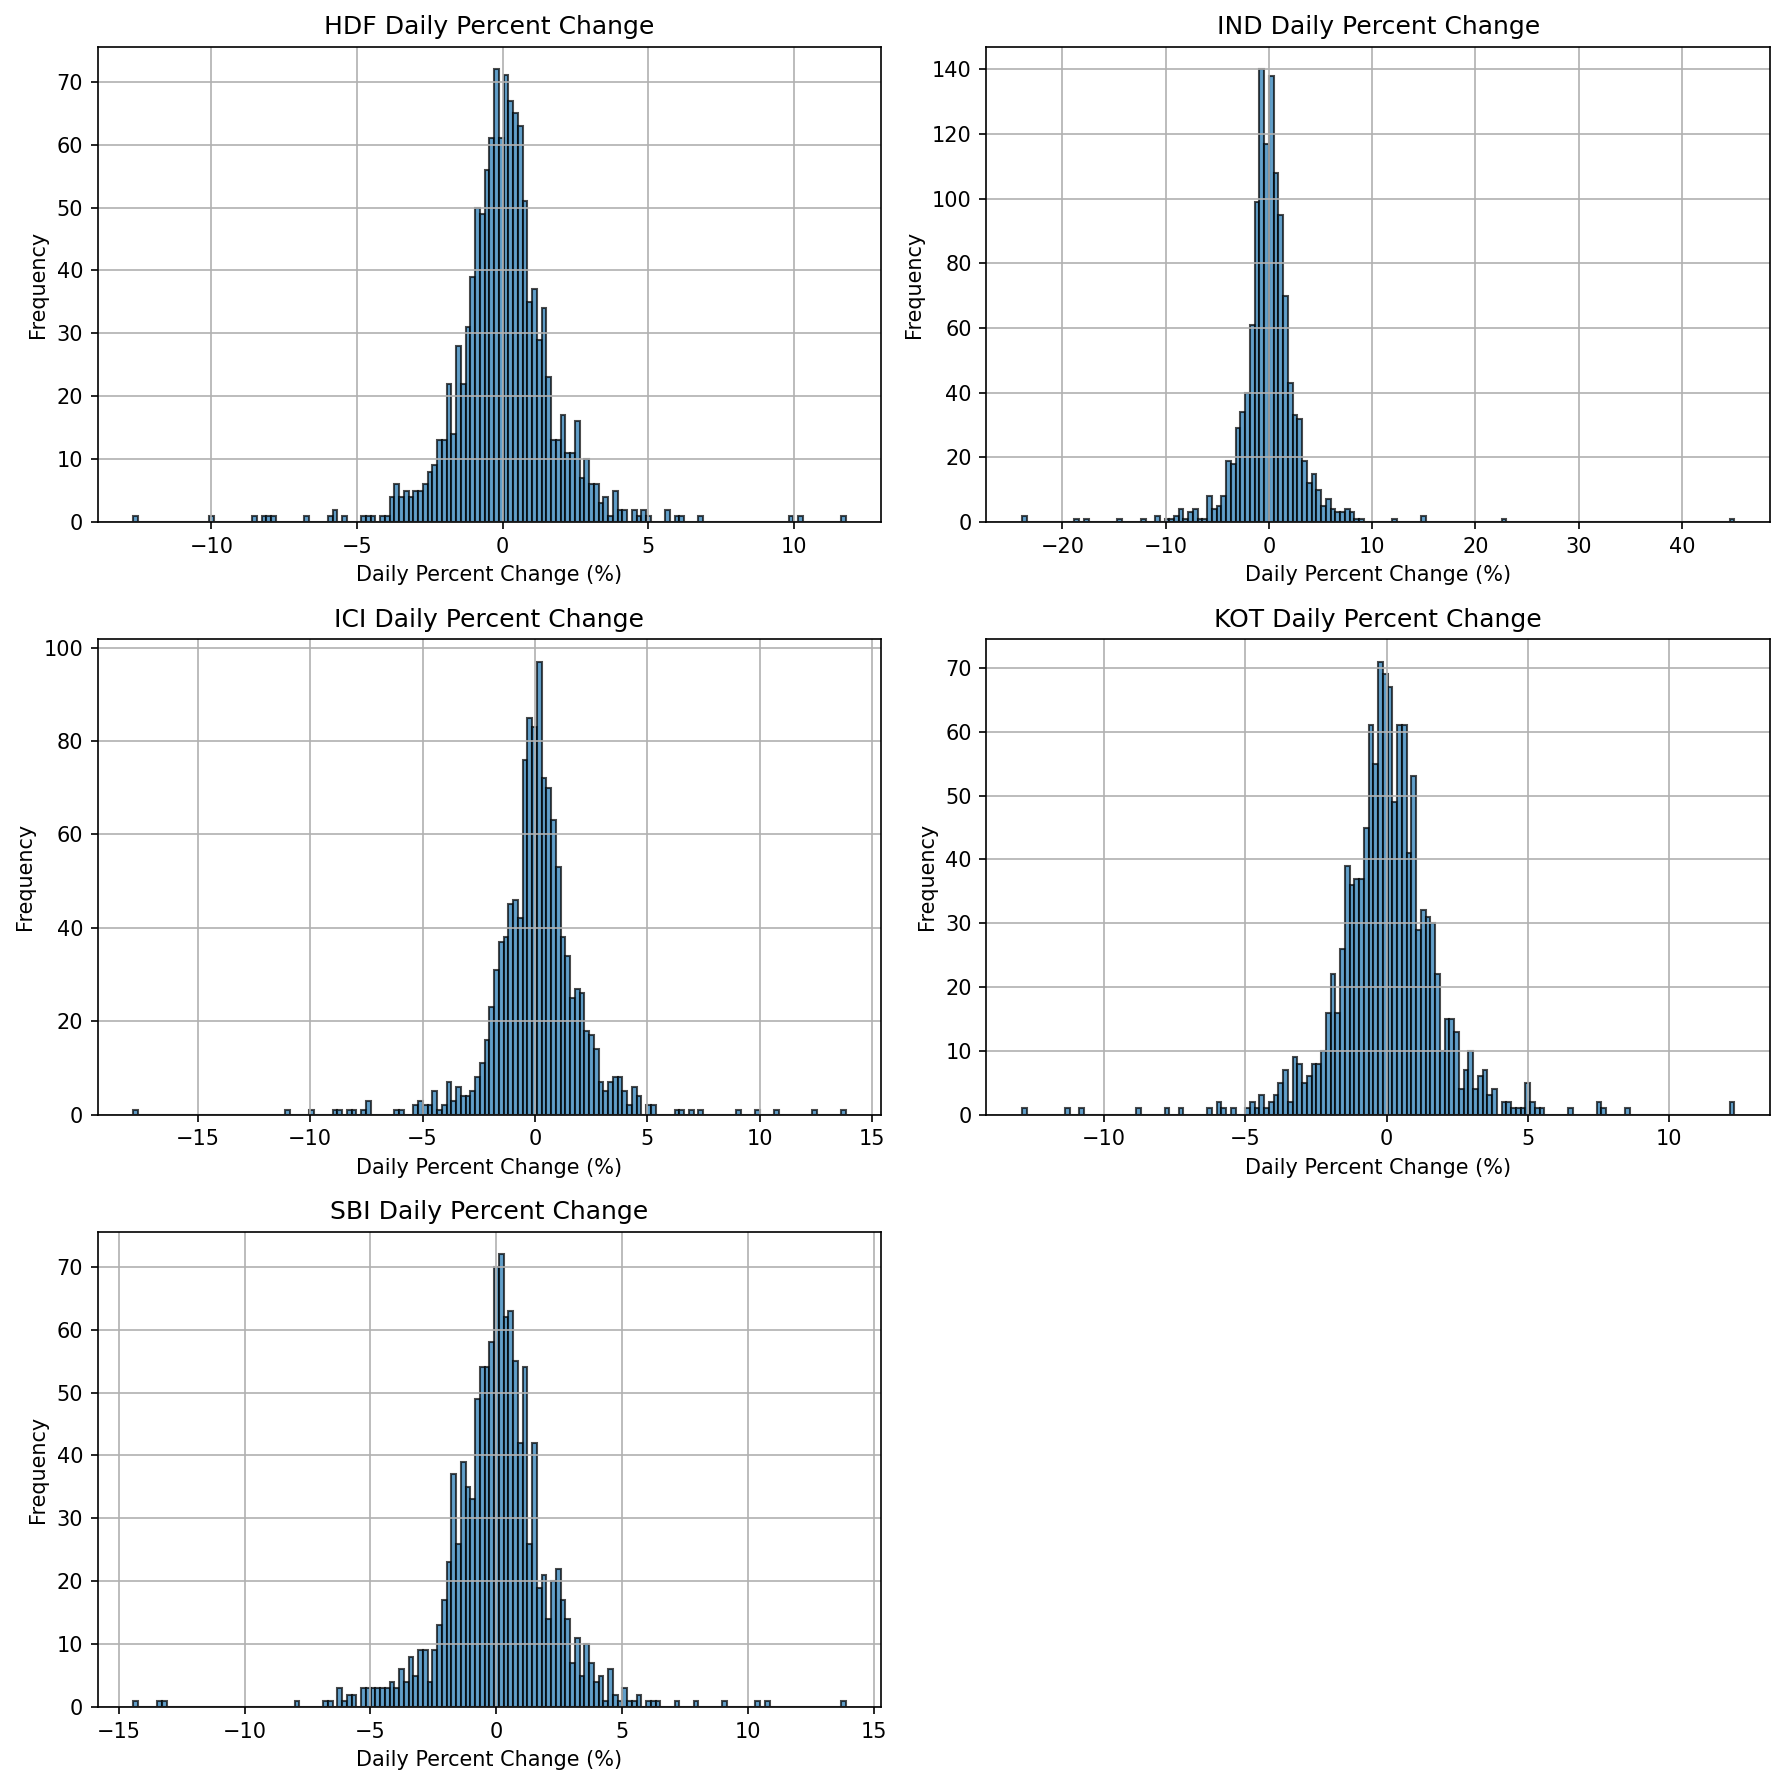

In [288]:
# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(12, 12), dpi=150)

# Plot a histogram for each stock in individual subplots
axes[0, 0].hist(HDF['Daily Percent Change'], bins=150, alpha=0.7, edgecolor='black', label='HDF')
axes[0, 0].set_title('HDF Daily Percent Change', fontsize=12)
axes[0, 0].set_xlabel('Daily Percent Change (%)', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].grid(True)

axes[0, 1].hist(IND['Daily Percent Change'], bins=150, alpha=0.7, edgecolor='black', label='IND')
axes[0, 1].set_title('IND Daily Percent Change', fontsize=12)
axes[0, 1].set_xlabel('Daily Percent Change (%)', fontsize=10)
axes[0, 1].set_ylabel('Frequency', fontsize=10)
axes[0, 1].grid(True)

axes[1, 0].hist(ICI['Daily Percent Change'], bins=150, alpha=0.7, edgecolor='black', label='ICI')
axes[1, 0].set_title('ICI Daily Percent Change', fontsize=12)
axes[1, 0].set_xlabel('Daily Percent Change (%)', fontsize=10)
axes[1, 0].set_ylabel('Frequency', fontsize=10)
axes[1, 0].grid(True)

axes[1, 1].hist(KOT['Daily Percent Change'], bins=150, alpha=0.7, edgecolor='black', label='KOT')
axes[1, 1].set_title('KOT Daily Percent Change', fontsize=12)
axes[1, 1].set_xlabel('Daily Percent Change (%)', fontsize=10)
axes[1, 1].set_ylabel('Frequency', fontsize=10)
axes[1, 1].grid(True)

axes[2, 0].hist(SBI['Daily Percent Change'], bins=150, alpha=0.7, edgecolor='black', label='SBI')
axes[2, 0].set_title('SBI Daily Percent Change', fontsize=12)
axes[2, 0].set_xlabel('Daily Percent Change (%)', fontsize=10)
axes[2, 0].set_ylabel('Frequency', fontsize=10)
axes[2, 0].grid(True)

# If you don't need the last subplot (bottom-right corner), you can turn it off by using `axes[2, 1].axis('off')`
axes[2, 1].axis('off')  # Hide the empty subplot in the last position

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [289]:
#TASK--> If you had invested INR 10,000 in any stock at the given time series. Create a plot that shows the value of INR10000 for the given time period.  

In [290]:
def Invest_growth(investment, portfolio_list):
    decima_return = portfolio_list['Close Price'].pct_change(1)[1:]
    invest_growth = investment*(decima_return+1).cumprod()
    
    plt.figure(figsize=(10,6), dpi=150)
    plt.plot(invest_growth, label= f'{portfolio_list} Investment Growth', color= 'green')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Investment Value (₹)', fontsize=12)
    plt.grid(True)
    plt.show()
    
    return invest_growth

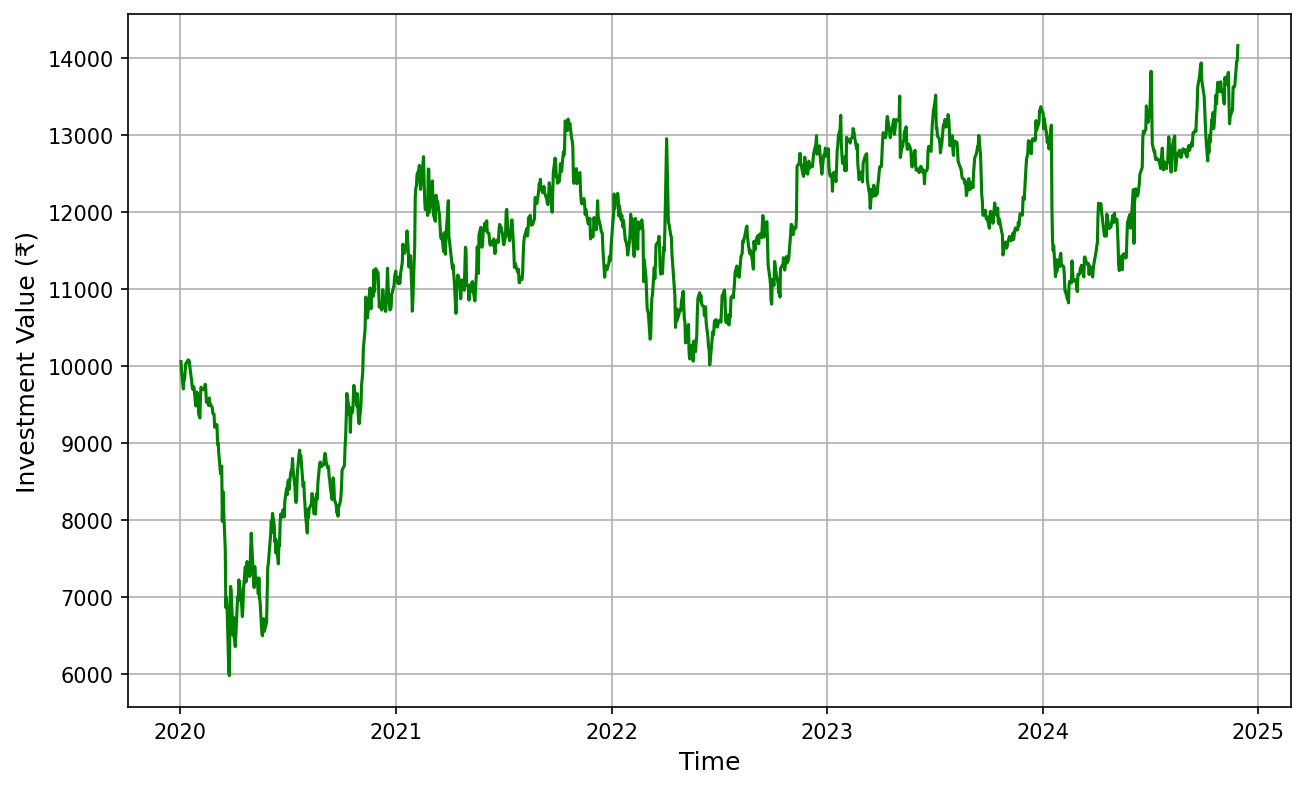

Date
2020-01-02    10059.419100
2020-01-03     9914.389586
2020-01-06     9703.686330
2020-01-07     9857.706892
2020-01-08     9827.997342
                  ...     
2024-11-21    13619.092295
2024-11-22    13650.365506
2024-11-25    13952.542903
2024-11-26    13958.797545
2024-11-27    14158.946093
Name: Close Price, Length: 1219, dtype: float64

In [291]:
Invest_growth(10000, HDF)

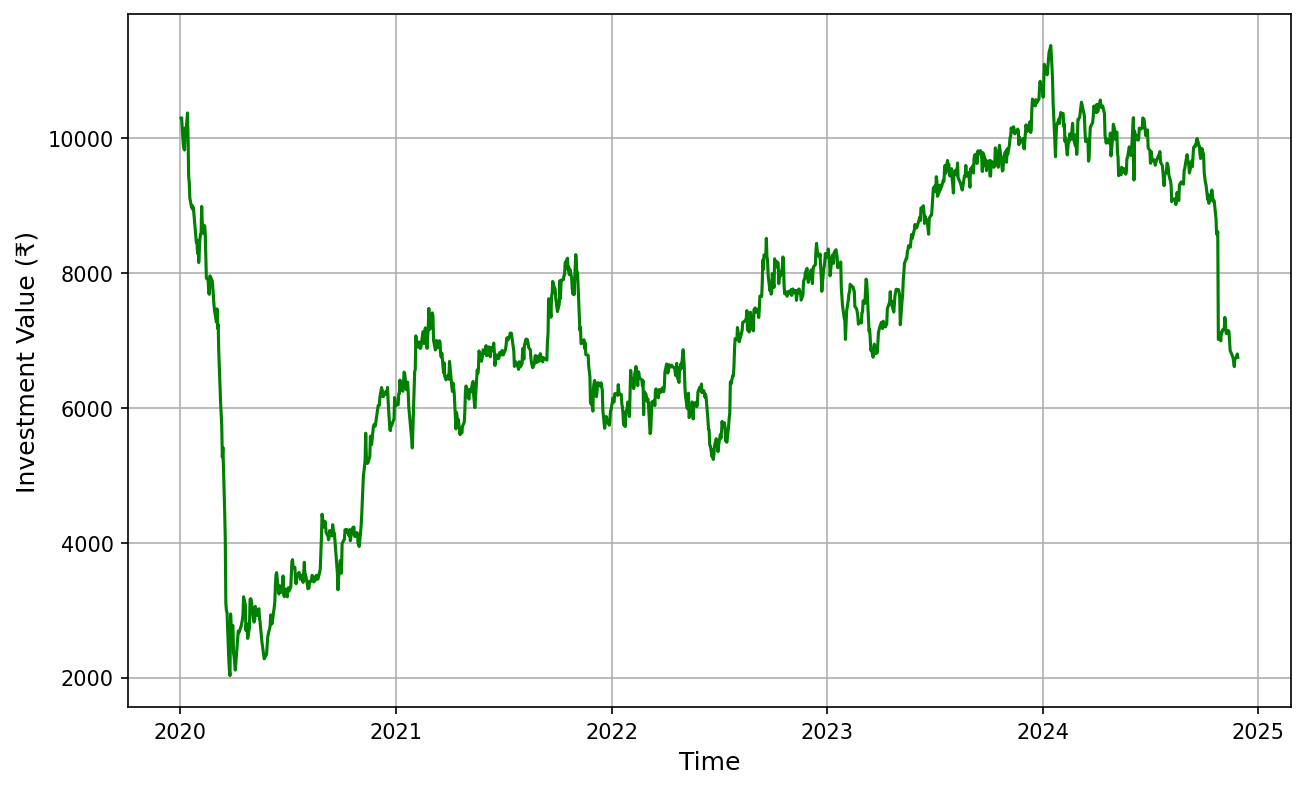

Date
2020-01-02    10298.733666
2020-01-03    10303.448740
2020-01-06     9894.921191
2020-01-07     9845.076115
2020-01-08     9826.215816
                  ...     
2024-11-21     6612.555571
2024-11-22     6724.033410
2024-11-25     6762.090799
2024-11-26     6799.811397
2024-11-27     6750.303112
Name: Close Price, Length: 1219, dtype: float64

In [292]:
Invest_growth(10000, IND)

In [293]:
IND

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Daily Percent Change
Date,,,,,,,,,,,,,
2020-01-01,1510.60,1523.55,1481.15,1484.60,1492.557685,74630,2759,111389580.0,15779,21.14,42.40,-26.00,NaN
2020-01-02,1490.00,1533.00,1486.65,1528.95,1511.281897,73754,4776,111463085.0,16607,22.52,46.35,38.95,2.987337
2020-01-03,1526.95,1537.30,1512.00,1529.65,1521.482398,93798,3243,142712006.0,37858,40.36,25.30,2.70,0.045783
2020-01-06,1507.40,1519.15,1466.40,1469.00,1490.728132,112404,5693,167563805.0,25881,23.02,52.75,-38.40,-3.964959
2020-01-07,1476.00,1507.40,1443.00,1461.60,1472.211149,116785,4985,171932179.0,15215,13.03,64.40,-14.40,-0.503744
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-21,1003.95,1003.95,967.00,981.70,976.910271,129233,5682,126249045.0,39034,30.20,36.95,-22.25,-1.844723
2024-11-22,983.90,1002.10,980.60,998.25,994.435052,155517,11808,154651556.0,52499,33.76,21.50,14.35,1.685851
2024-11-25,1021.00,1022.00,997.60,1003.90,1006.220180,312971,14406,314917736.0,89395,28.56,24.40,-17.10,0.565990


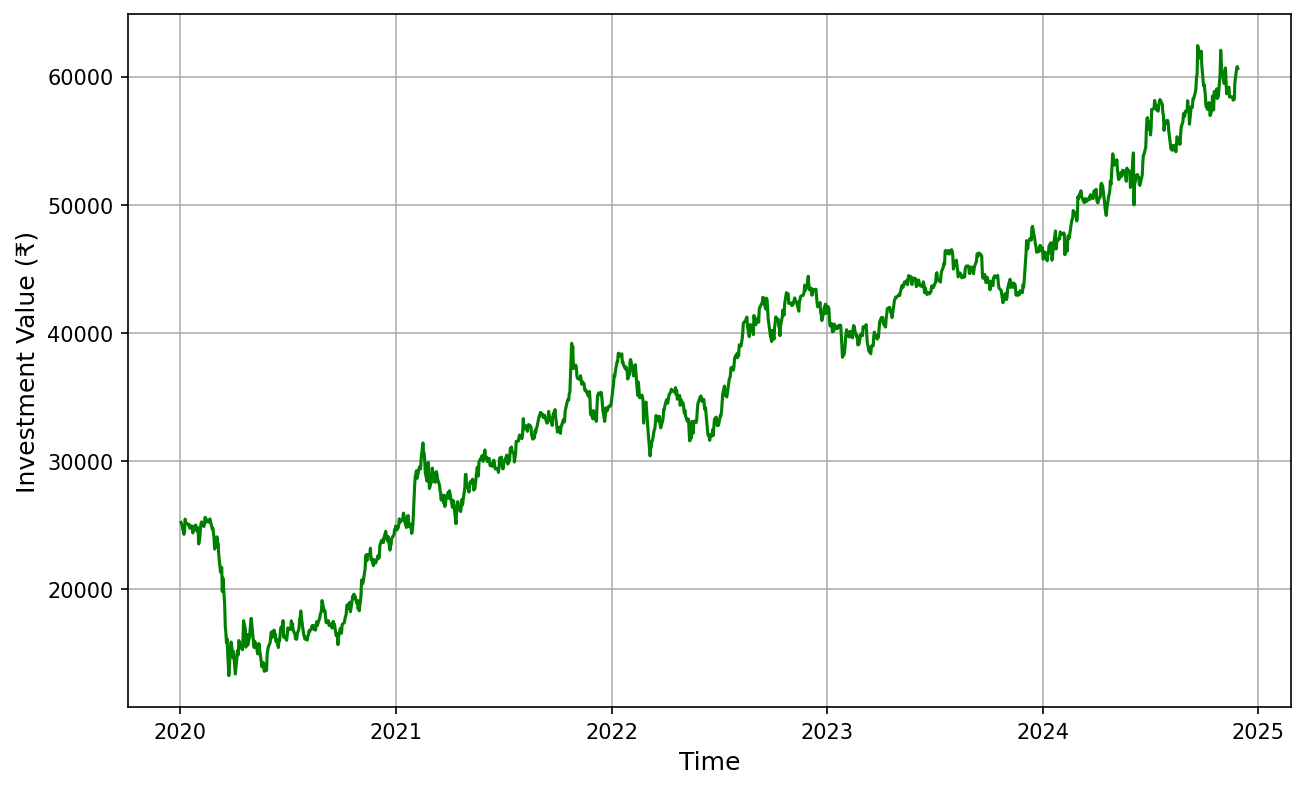

Date
2020-01-02    25181.631893
2020-01-03    25090.815946
2020-01-06    24480.719076
2020-01-07    24250.186289
2020-01-08    24490.033532
                  ...     
2024-11-21    58220.007452
2024-11-22    59528.688525
2024-11-25    60613.822653
2024-11-26    60779.154247
2024-11-27    60630.122951
Name: Close Price, Length: 1219, dtype: float64

In [294]:
Invest_growth(25000, ICI)

In [295]:
# TASK--> FIND THE ANNUALIZED SHARPE RATIO FOR EACH STOCK IN THE PORTFOLIO

In [311]:
def sharpe_ratio(ticker, risk_free_rate=0.065):
 
    mean_return = ticker['Close Price'].pct_change(1).mean()
    std = ticker['Close Price'].pct_change(1).std()
    sharpe_ratio = (mean_return - risk_free_rate)/std
    Annualized_Sharpe_ratio = (252**0.5)*sharpe_ratio
    return sharpe_ratio

In [327]:
for ticker, df in ticker.items():
    print (f"{ticker} Annualized Sharpe Ratio is:{sharpe_ratio(df)}") # it was showing the answer previously now I dont know what has happened!

AttributeError: 'str' object has no attribute 'items'

In [328]:
# PART 2 VOLUME ANALYSIS

'TASK--> CREATE A PLOT SHOWING THE DAILY DOLLAR VOLUME pf STOCK TRADED OVER THE TIME PERIOD OF 5 YEARS'

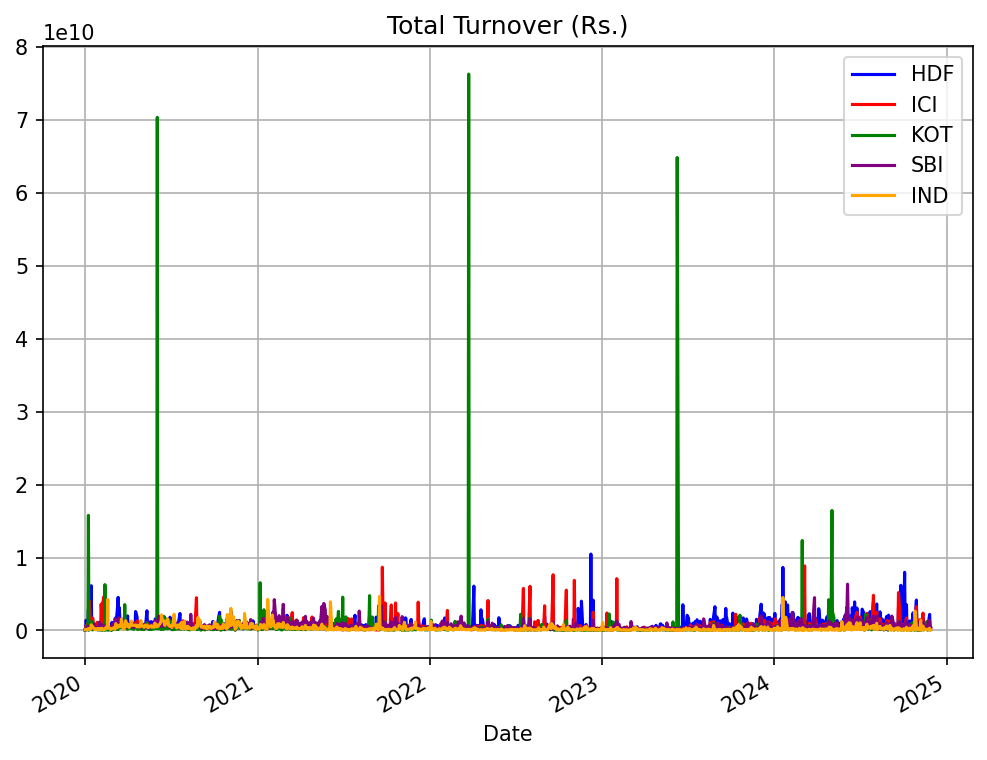

In [439]:
import matplotlib.pyplot as plt

plt.figure(dpi=150, figsize=(8, 6))


HDF['Total Turnover (Rs.)'].plot(label='HDF', color='blue')
ICI['Total Turnover (Rs.)'].plot(label='ICI', color='red')
KOT['Total Turnover (Rs.)'].plot(label='KOT', color='green')
SBI['Total Turnover (Rs.)'].plot(label='SBI', color='purple')
IND['Total Turnover (Rs.)'].plot(label='IND', color='orange')
plt.title('Total Turnover (Rs.)')
plt.legend(bbox_to_anchor=(1, 1))

plt.grid(True)

plt.show()


In [363]:
def max_traded_value(ticker):
    Max_traded = ticker['Total Turnover (Rs.)'].max()
    Max_traded_date = ticker['Total Turnover (Rs.)'].idxmax()
    return Max_traded, Max_traded_date

In [365]:
 max_traded_value(ICI)

(8847821544.0, Timestamp('2024-03-05 00:00:00'))

In [364]:
 max_traded_value(HDF)

(10468481670.0, Timestamp('2022-12-08 00:00:00'))

In [366]:
 max_traded_value(KOT)

(76268920559.0, Timestamp('2022-03-24 00:00:00'))

In [367]:
 max_traded_value(SBI)

(6343382382.0, Timestamp('2024-06-04 00:00:00'))

In [368]:
 max_traded_value(IND)

(4650156794.0, Timestamp('2021-09-16 00:00:00'))

In [393]:
print= ("TASK--> USING EACH STOCK CREATE A PLOT SHOWING CLOSE PRICE ALONG WITH 60 DAY MOVING AVERAGE")
print

'TASK--> USING EACH STOCK CREATE A PLOT SHOWING CLOSE PRICE ALONG WITH 60 DAY MOVING AVERAGE'

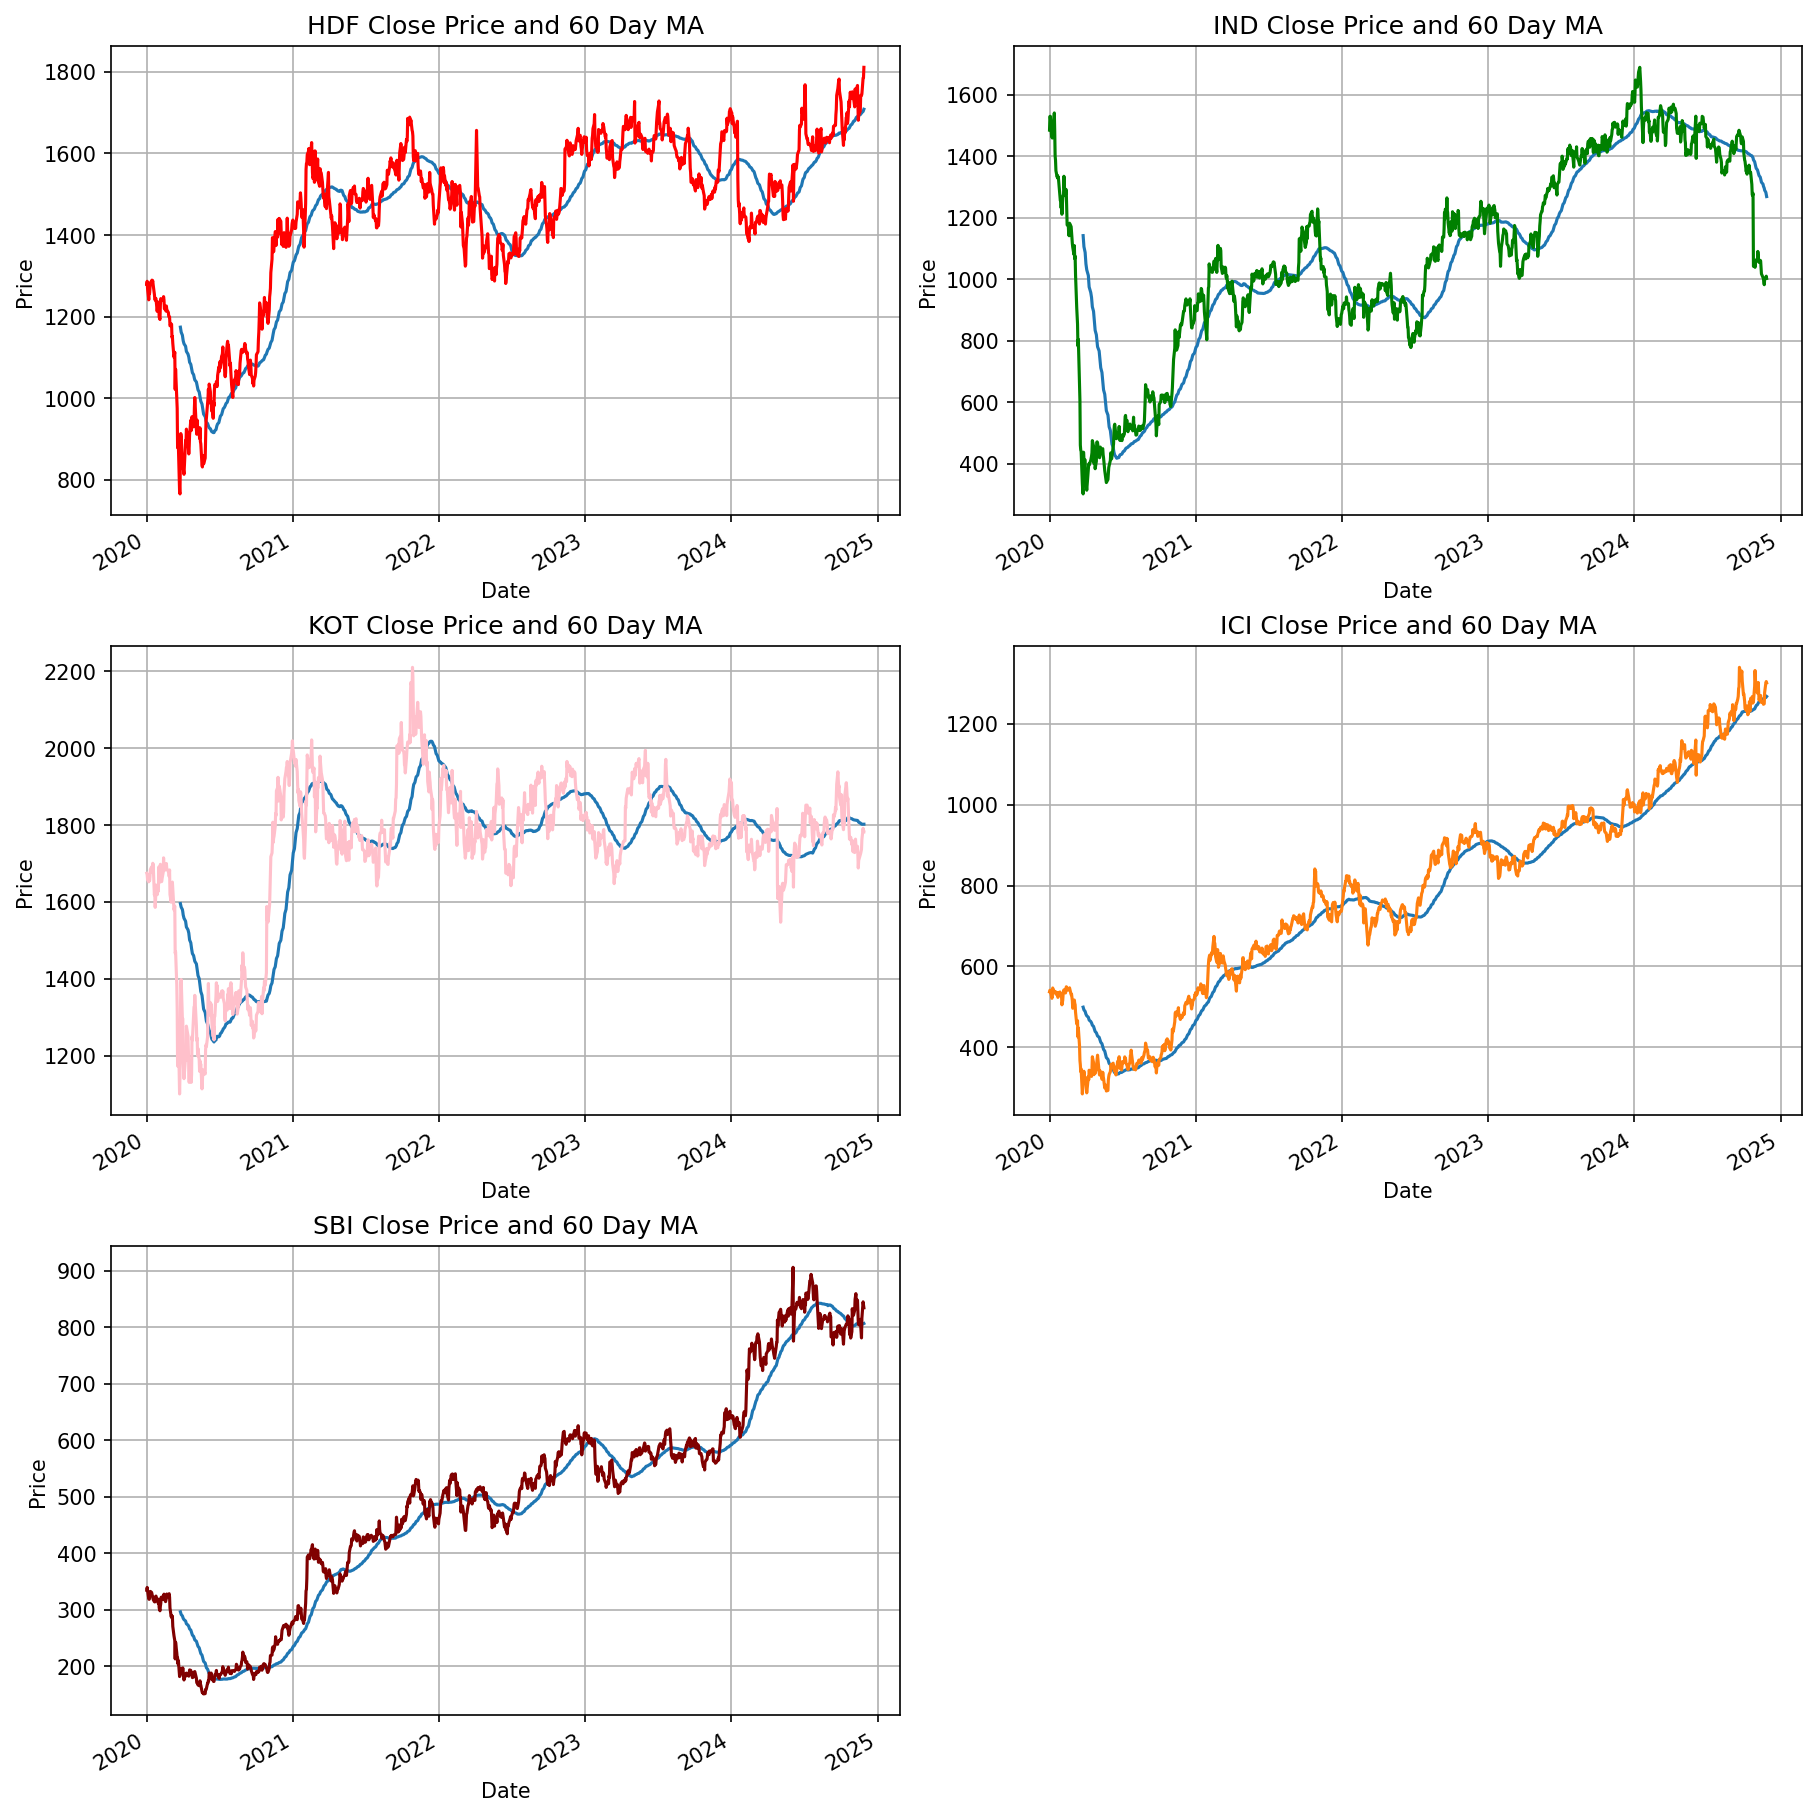

In [389]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12), dpi=150, constrained_layout=True)


HDF['Close Price'].rolling(window=60).mean().plot(ax=axes[0,0], label='60 day MA')
HDF['Close Price'].plot(ax=axes[0,0], label='Close Price', color='red')
axes[0, 0].grid(True)
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price')
axes[0, 0].legend
axes[0, 0].set_title('HDF Close Price and 60 Day MA')

IND['Close Price'].rolling(window=60).mean().plot(ax=axes[0,1], label='60 day MA')
IND['Close Price'].plot(ax=axes[0,1], label='Close Price', color='green')
axes[0, 1].grid(True)
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Price')
axes[0, 1].legend
axes[0, 1].set_title('IND Close Price and 60 Day MA')

KOT['Close Price'].rolling(window=60).mean().plot(ax=axes[1,0], label='60 day MA')
KOT['Close Price'].plot(ax=axes[1,0], label='Close Price', color='Pink')
axes[1, 0].grid(True)
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Price')
axes[1, 0].legend
axes[1, 0].set_title('KOT Close Price and 60 Day MA')

ICI['Close Price'].rolling(window=60).mean().plot(ax=axes[1,1], label='60 day MA')
ICI['Close Price'].plot(ax=axes[1,1], label='Close Price')
axes[1, 1].grid(True)
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Price')
axes[1, 1].legend
axes[1, 1].set_title('ICI Close Price and 60 Day MA')

SBI['Close Price'].rolling(window=60).mean().plot(ax=axes[2,0], label='60 day MA')
SBI['Close Price'].plot(ax=axes[2,0], label='Close Price', color='maroon')
axes[2, 0].grid(True)
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('Price')
axes[2, 0].legend
axes[2, 0].set_title('SBI Close Price and 60 Day MA')

axes[2, 1].axis('off')


# Show the plot
plt.show()


'TASK--> CREATE A PLOT WHICH HAS THE CLOSE PRICE AND THE UPPER AND LOWER BOLLINGER BANDS. WITH N=20 DAY FOR THE ROLLING RATE OF THE MOVING AVERAGE AND K=2 FOR THE MULITLPLICATION OF THE STANDARD DEVIATION'

In [433]:
def Bollinger_bands(ticker,K=2,N=20):
    
    ticker['MA']=  ticker['Close Price'].rolling(N).mean()
    ticker['std']= ticker['Close Price'].rolling(N).std()
    ticker['BBL']= ticker['MA'] - K*ticker['std']
    ticker['BBU']= ticker['MA'] + K*ticker['std']
    
    plt.figure(figsize=(20,6), dpi=150)
    plt.plot(ticker['Close Price'], label='Close Price', color='blue')
    plt.plot(ticker['BBL'], label='Lower Bollinger Band (BBL)', color='red')
    plt.plot(ticker['BBU'], label='Upper Bollinger Band (BBU)', color='green')
    
    plt.title("Bollinger Bands")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.show()
    


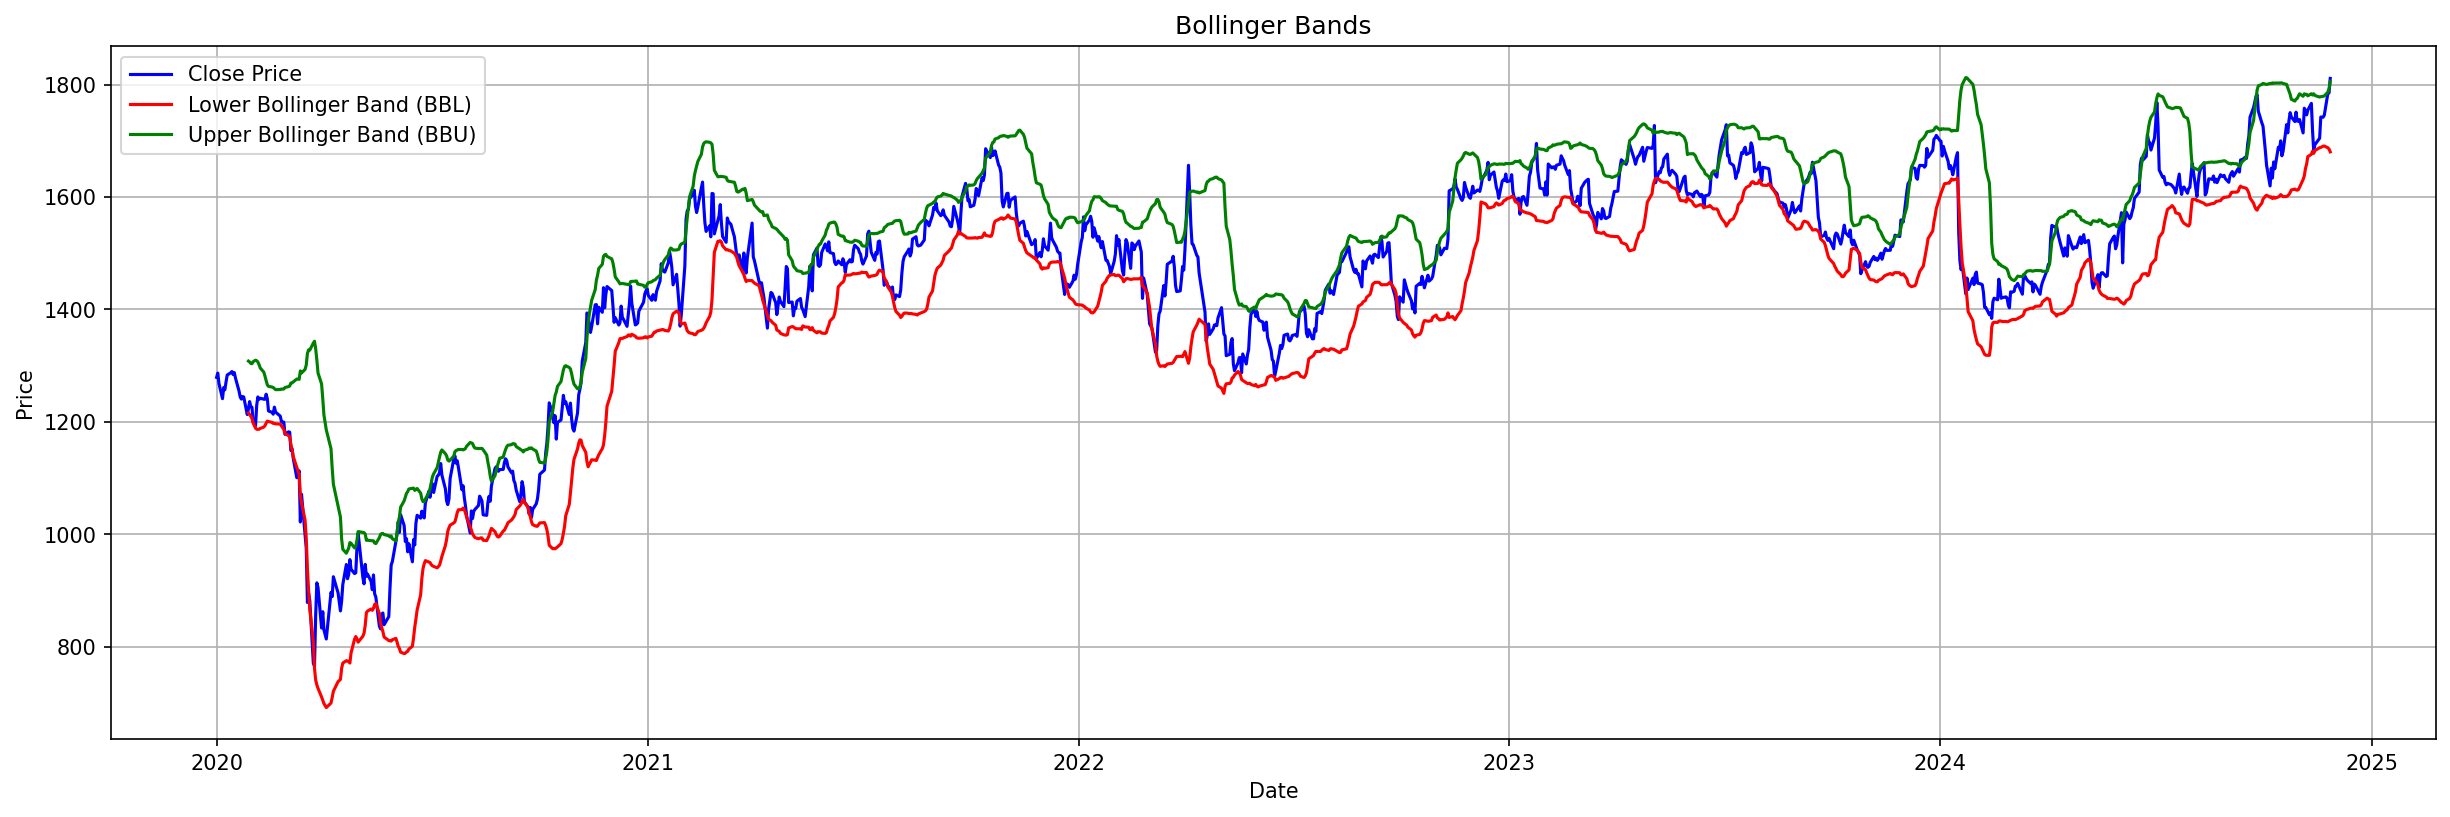

In [434]:
Bollinger_bands(HDF)

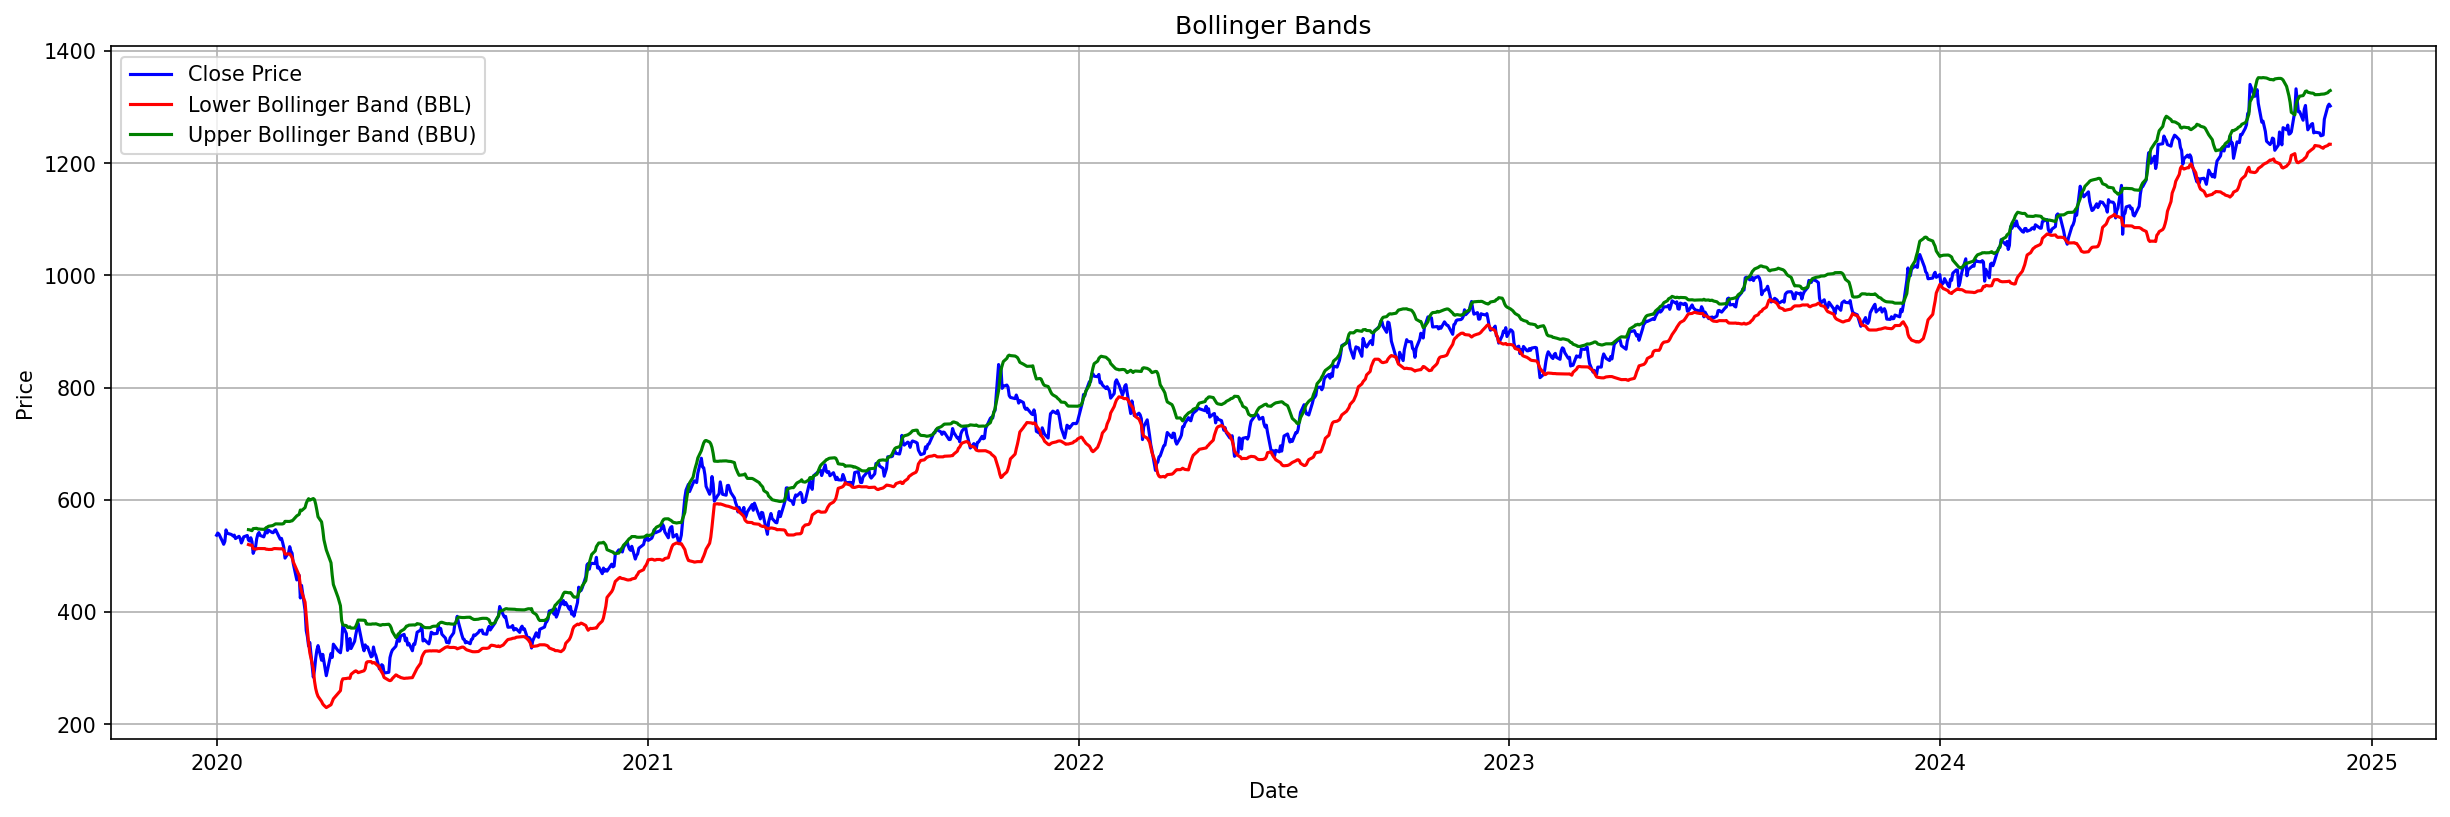

In [435]:
Bollinger_bands(ICI)

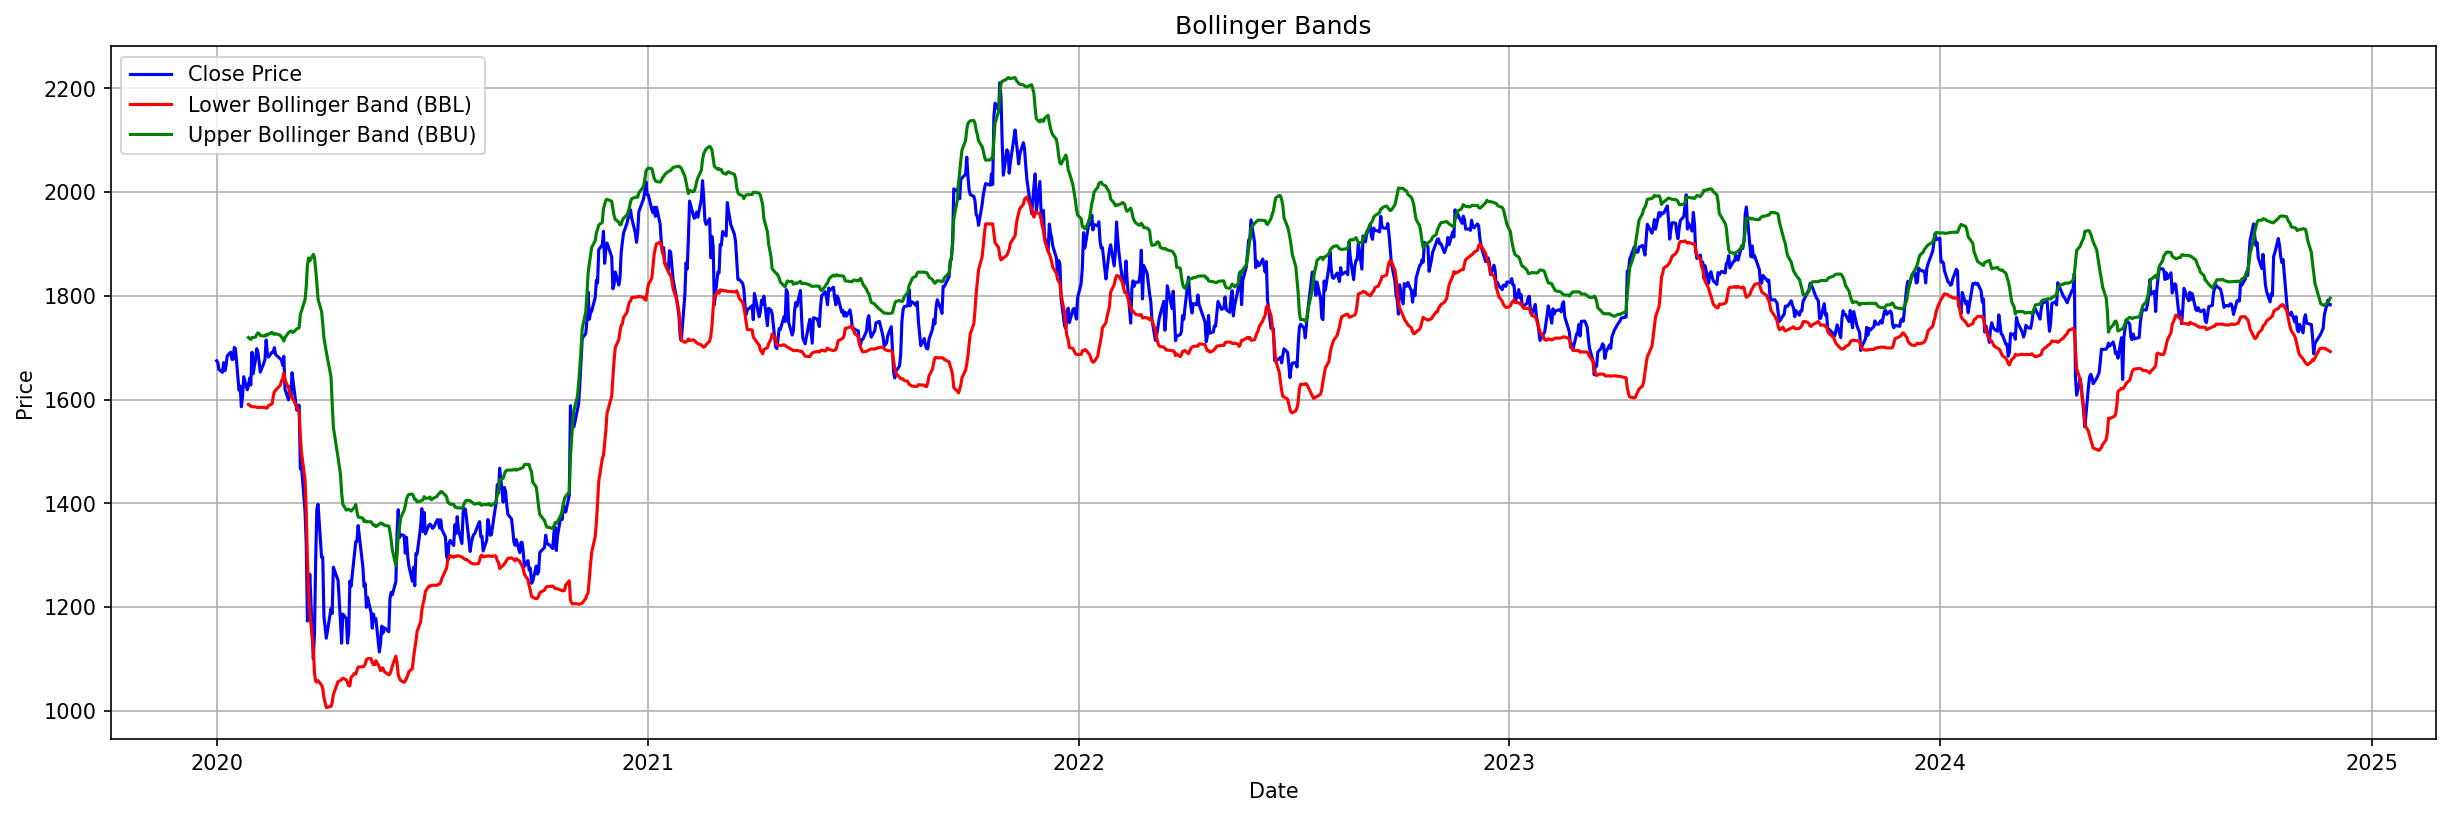

In [436]:
Bollinger_bands(KOT)

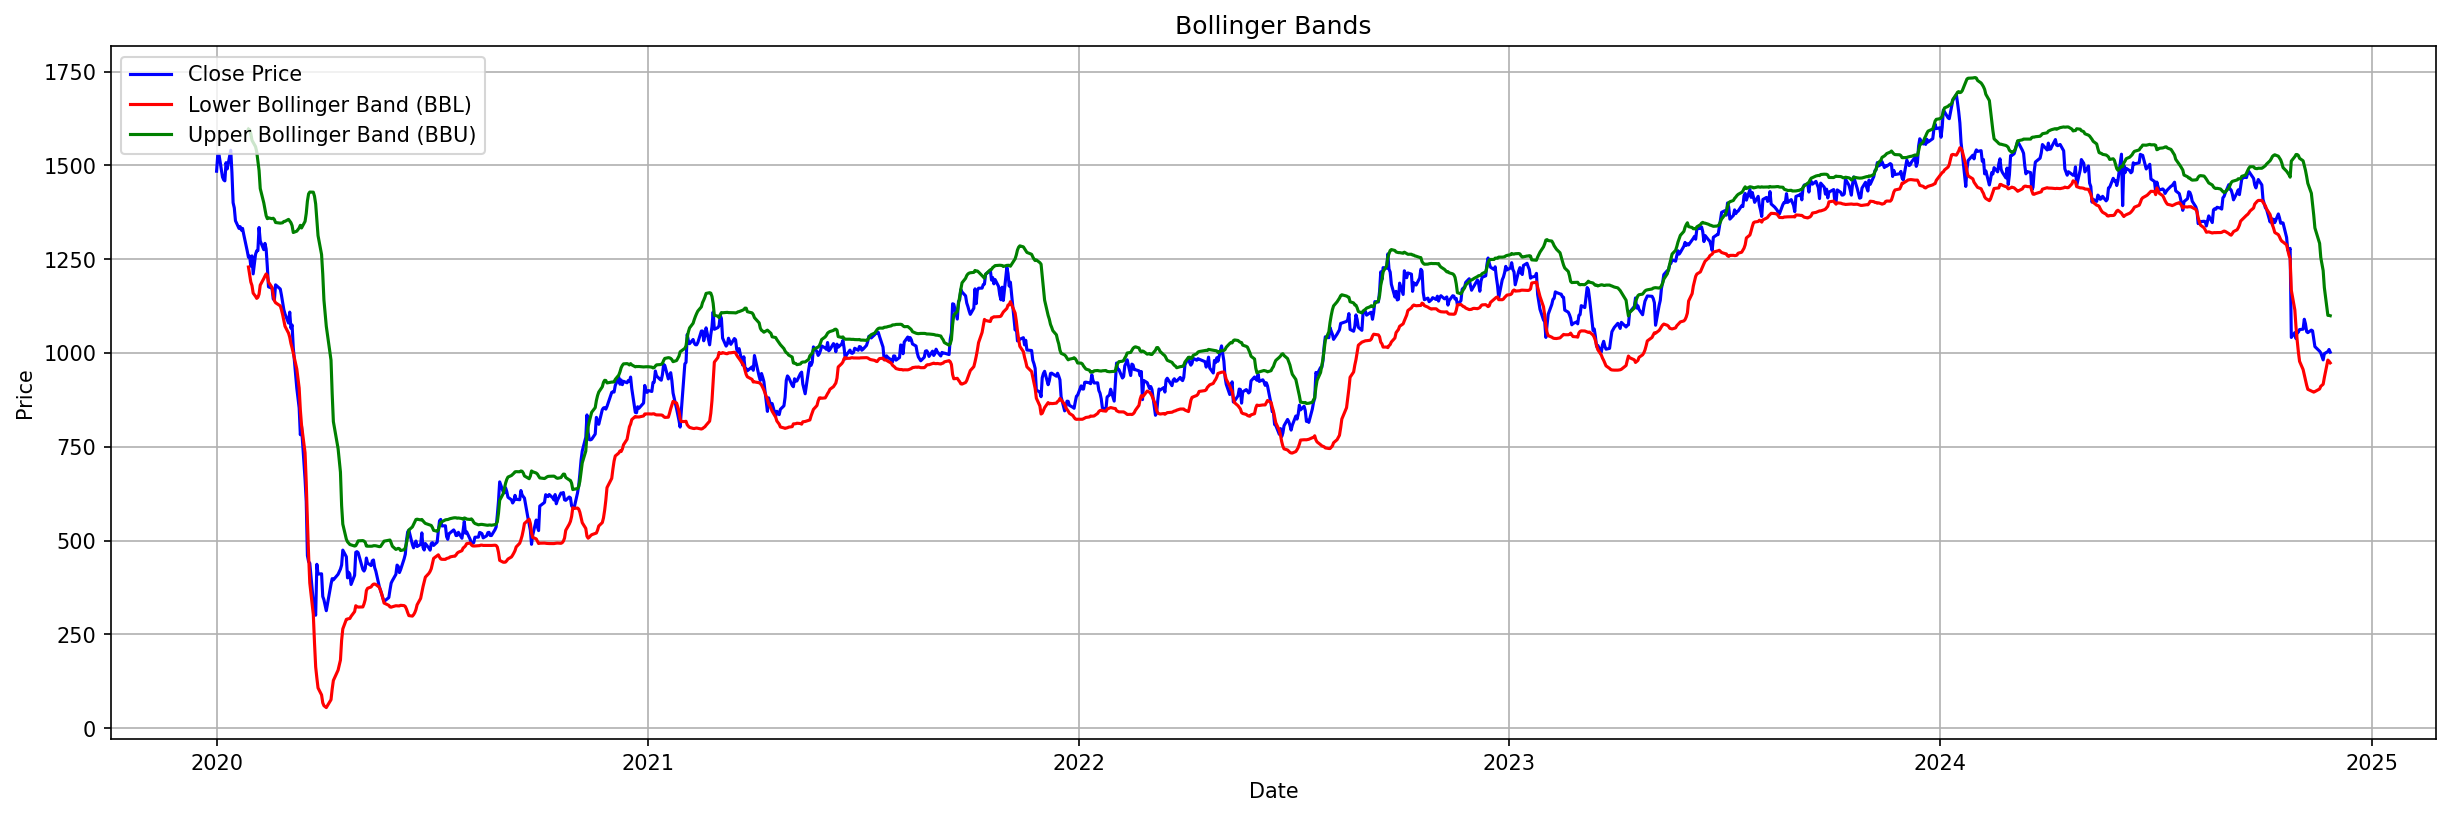

In [437]:
Bollinger_bands(IND)

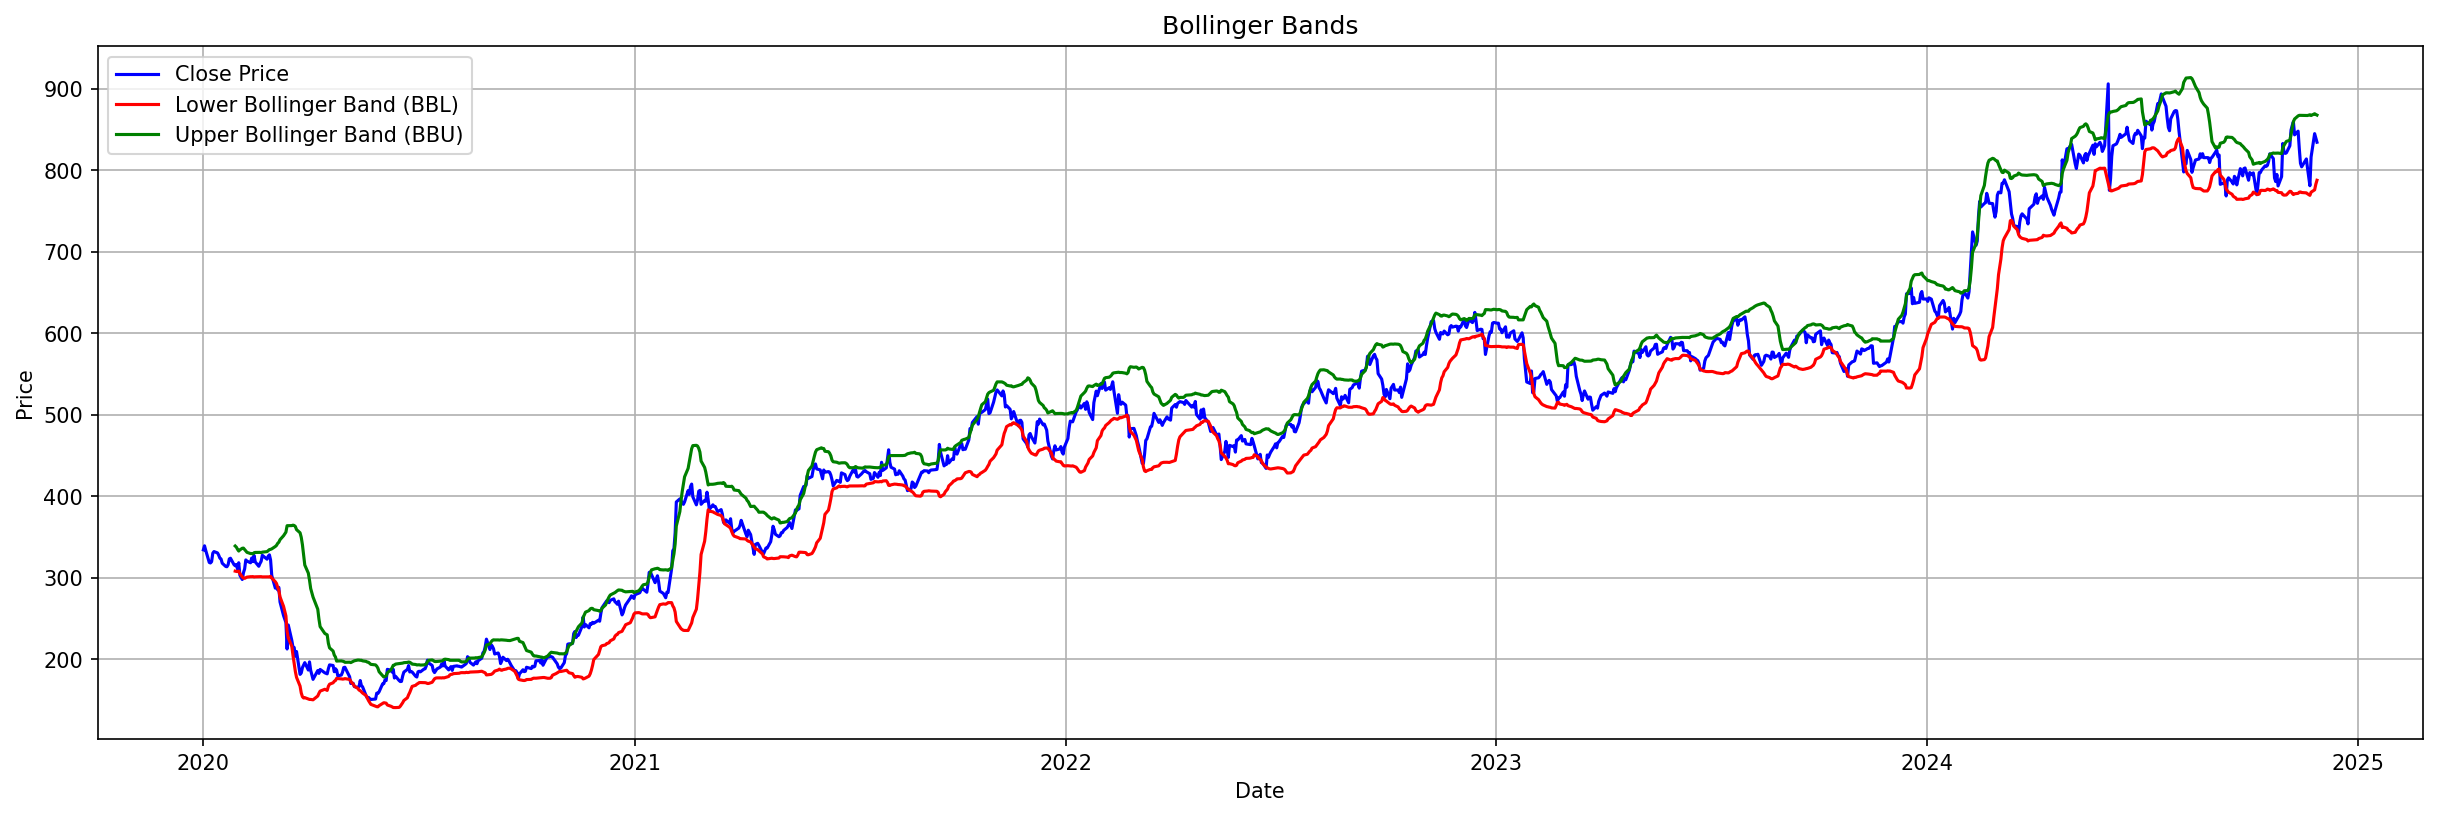

In [438]:
Bollinger_bands(SBI)